### **Generate a dataset (Random)**

In [1]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Define possible search queries
search_queries = [
    "python", "python for beginners", "data science", "machine learning",
    "ml", "ai course", "excel", "sql", "web development",
    "javascript", "java", "react", "deep learning",
    "cloud computing", "aws", "cyber security", "blockchain"
]

# Generate 100 rows
n = 100
data = {
    "user_id": [f"U{str(i).zfill(3)}" for i in range(1, n+1)],
    "search_query": np.random.choice(search_queries, n),
    "results_count": [],
    "clicked": [],
    "purchased": []
}

# Logic to make data realistic
for query in data["search_query"]:

    # Simulate results_count based on query frequency
    if query in ["ml", "ai course"]:
        results = np.random.choice([0, 5, 10], p=[0.6, 0.2, 0.2])
    elif query in ["python", "data science", "machine learning"]:
        results = np.random.randint(50, 200)
    else:
        results = np.random.randint(10, 100)

    data["results_count"].append(results)

    # Click probability
    if results == 0:
        clicked = 0
    else:
        clicked = np.random.choice([0, 1], p=[0.4, 0.6])

    data["clicked"].append(clicked)

    # Purchase probability
    if clicked == 1 and query in ["python", "machine learning", "excel"]:
        purchased = np.random.choice([0, 1], p=[0.7, 0.3])
    elif clicked == 1:
        purchased = np.random.choice([0, 1], p=[0.85, 0.15])
    else:
        purchased = 0

    data["purchased"].append(purchased)

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("search_data.csv", index=False)

df.head()


,user_id,search_query,results_count,clicked,purchased
0,U001,excel,99,0,0
1,U002,aws,23,1,0
2,U003,java,24,0,0
3,U004,sql,86,0,0
4,U005,excel,61,1,0


### Add some other parameters for Analysis

In [2]:
# Add derived metrics for analysis

# CTR at row level (clicked or not)
df["CTR"] = df["clicked"]

# Conversion at row level (purchased or not)
df["Conversion"] = df["purchased"]

# Flag for zero results
df["no_results"] = df["results_count"].apply(lambda x: 1 if x == 0 else 0)

# Aggregate dataset to keyword-level for further reports:
keyword_df = df.groupby("search_query").agg({
    "results_count": "mean",
    "clicked": "sum",
    "purchased": "sum",
    "CTR": "mean",
    "Conversion": "mean",
    "no_results": "sum",
    "user_id": "count"
}).rename(columns={"user_id": "search_count"}).reset_index()

keyword_df


,search_query,results_count,clicked,purchased,CTR,Conversion,no_results,search_count
0,ai course,10.000000,2,0,1.000000,0.000000,0,2
1,aws,38.888889,5,0,0.555556,0.000000,0,9
2,blockchain,46.000000,1,0,0.333333,0.000000,0,3
3,cloud computing,36.600000,3,0,0.600000,0.000000,0,5
4,cyber security,32.000000,4,0,1.000000,0.000000,0,4
5,data science,132.444444,5,2,0.555556,0.222222,0,9
6,deep learning,54.333333,3,0,1.000000,0.000000,0,3
7,excel,68.625000,4,0,0.500000,0.000000,0,8
8,java,37.500000,2,0,0.500000,0.000000,0,4
9,javascript,74.000000,3,0,0.750000,0.000000,0,4


### Descriptive Summary Report

In [4]:
summary = {
    "Total Users": df["user_id"].nunique(),
    "Total Searches": len(df),
    "Total Clicks": df["clicked"].sum(),
    "Total Purchases": df["purchased"].sum(),
    "Average CTR": df["clicked"].mean(),
    "Average Conversion Rate": df["purchased"].mean(),
    "Zero-Result Searches": df["no_results"].sum()
}

summary_df = pd.DataFrame(summary.items(), columns=["Metric", "Value"])
summary_df


,Metric,Value
0,Total Users,100.00
1,Total Searches,100.00
2,Total Clicks,57.00
3,Total Purchases,9.00
4,Average CTR,0.57
5,Average Conversion Rate,0.09
6,Zero-Result Searches,4.00


## Keyword Performance Report

In [5]:
keyword_report = keyword_df[[
    "search_query",
    "search_count",
    "results_count",
    "clicked",
    "CTR",
    "purchased",
    "Conversion",
    "no_results"
]]

keyword_report

,search_query,search_count,results_count,clicked,CTR,purchased,Conversion,no_results
0,ai course,2,10.000000,2,1.000000,0,0.000000,0
1,aws,9,38.888889,5,0.555556,0,0.000000,0
2,blockchain,3,46.000000,1,0.333333,0,0.000000,0
3,cloud computing,5,36.600000,3,0.600000,0,0.000000,0
4,cyber security,4,32.000000,4,1.000000,0,0.000000,0
5,data science,9,132.444444,5,0.555556,2,0.222222,0
6,deep learning,3,54.333333,3,1.000000,0,0.000000,0
7,excel,8,68.625000,4,0.500000,0,0.000000,0
8,java,4,37.500000,2,0.500000,0,0.000000,0
9,javascript,4,74.000000,3,0.750000,0,0.000000,0


In [6]:
keyword_report.to_csv("keyword_performance_report.csv", index=False)


## Funnel Report (Search → Click → Purchase)

In [7]:
funnel = pd.DataFrame({
    "Stage": ["Searches", "Clicks", "Purchases"],
    "Count": [len(df), df["clicked"].sum(), df["purchased"].sum()]
})

funnel["Drop_Off_%"] = funnel["Count"].pct_change() * -100
funnel.loc[0, "Drop_Off_%"] = 0

funnel


,Stage,Count,Drop_Off_%
0,Searches,100,0.000000
1,Clicks,57,43.000000
2,Purchases,9,84.210526


### Correlation Report

In [8]:
corr_df = df[["results_count", "clicked", "purchased"]].corr()
corr_df

,results_count,clicked,purchased
results_count,1.000000,-0.029671,0.168721
clicked,-0.029671,1.000000,0.273148
purchased,0.168721,0.273148,1.000000


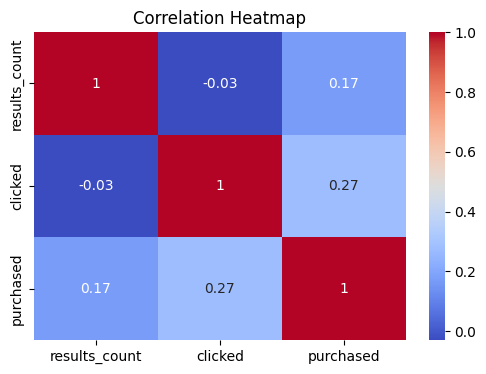

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Some charts on the Analysis done above

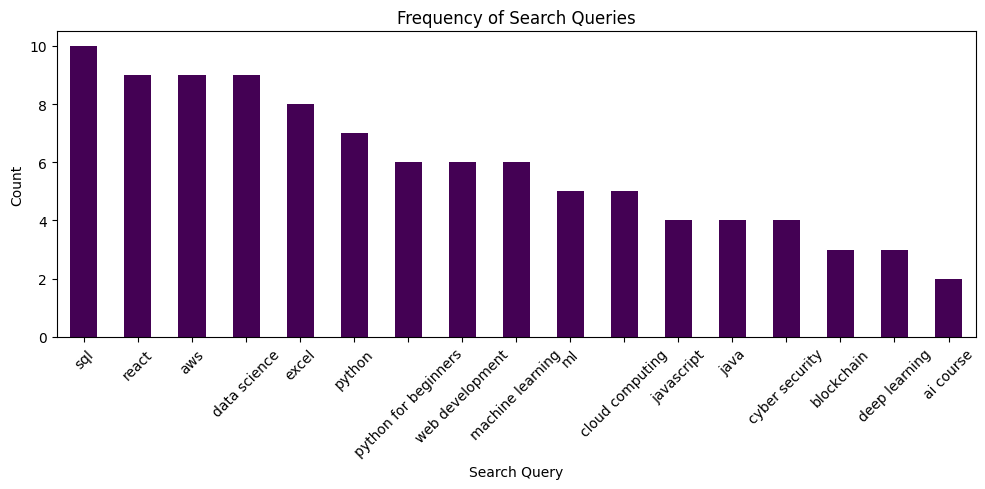

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("search_data.csv")

plt.figure(figsize=(10,5))
df['search_query'].value_counts().plot(kind='bar', cmap='viridis')
plt.title("Frequency of Search Queries")
plt.xlabel("Search Query")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

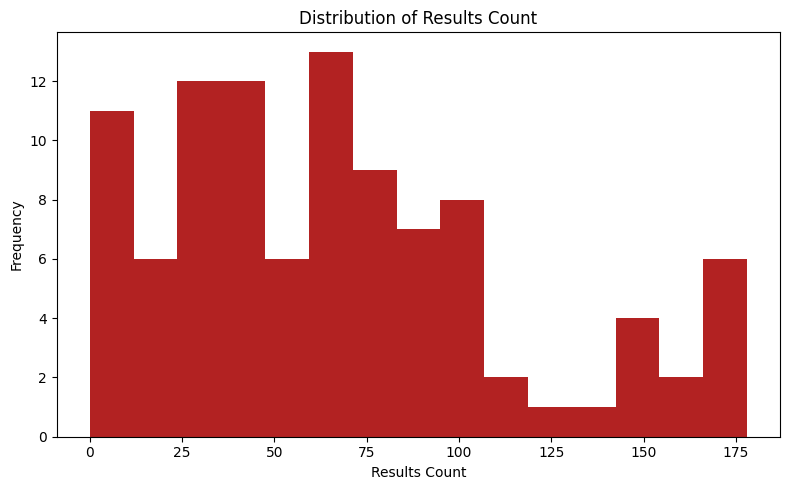

In [28]:
plt.figure(figsize=(8,5))
plt.hist(df['results_count'], bins=15, color ='firebrick')
plt.title("Distribution of Results Count")
plt.xlabel("Results Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


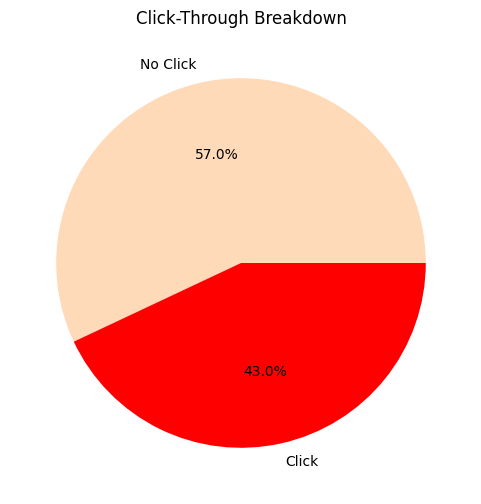

In [31]:
click_counts = df['clicked'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(click_counts, labels=["No Click", "Click"], autopct="%1.1f%%", colors =['peachpuff', 'Red'])
plt.title("Click-Through Breakdown")
plt.show()


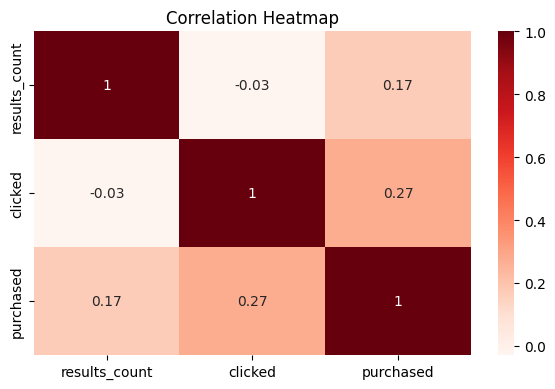

In [20]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(df[['results_count','clicked','purchased']].corr(), annot=True, cmap="Reds")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

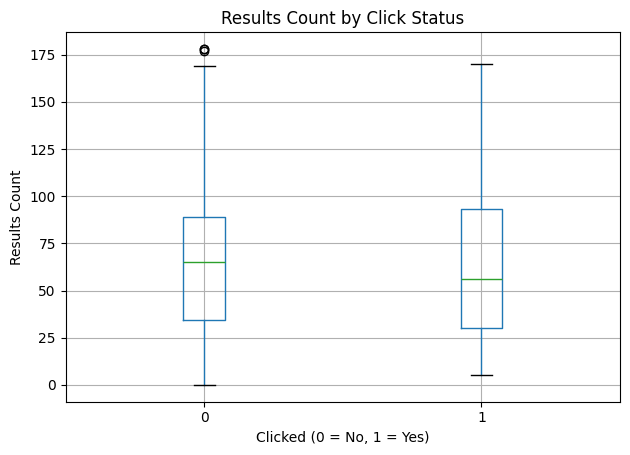

In [33]:
plt.figure(figsize=(8,5))
df.boxplot(column='results_count', by='clicked')
plt.title("Results Count by Click Status")
plt.suptitle("")  # removes automatic Matplotlib title
plt.xlabel("Clicked (0 = No, 1 = Yes)")
plt.ylabel("Results Count")
plt.tight_layout()
plt.show()
